In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2790,5013-SBUIH,Female,0,No,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,109.65,5551.15,Yes
3525,5889-JTMUL,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,95.05,4888.7,Yes
1641,5980-BDHPY,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),87.10,6230.1,No
4207,8706-HRADD,Male,0,No,No,21,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,43.55,1011.5,No
4270,2167-FQSTQ,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,92.40,6786.1,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]['TotalCharges']

' '

In [9]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-11-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

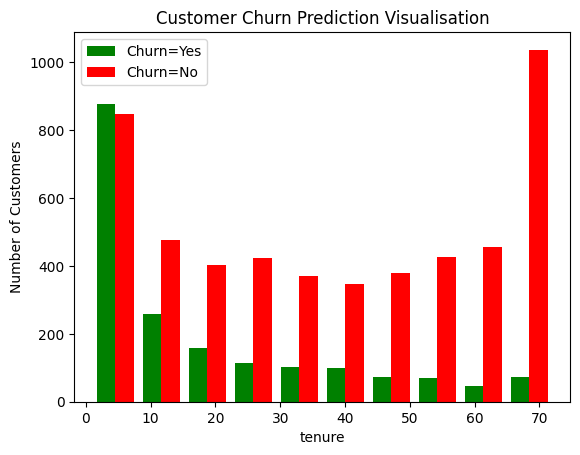

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([tenure_churn_yes,tenure_churn_no] , color=['green','red'] , label = ['Churn=Yes','Churn=No'])
plt.legend()

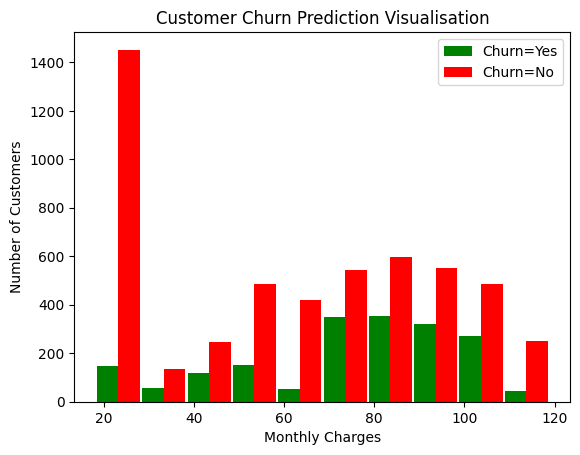

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

blood_sugar_man = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes,mc_churn_no] , rwidth=0.95 , color=['green','red'] , label = ['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-17-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-17-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-19-837d33d3d9d9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-19-837d33d3d9d9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-19-837d33d3d9d9>:5: Setting

In [20]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-21-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-21-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-21-ba15

In [22]:
df1['gender'].unique()

array([1, 0])

In [23]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2772,1,0,1,1,67,1,1,1,1,0,...,True,False,False,False,False,True,False,True,False,False
6057,0,0,0,0,19,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
5553,0,0,0,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
2971,1,0,1,1,59,1,1,1,1,1,...,True,False,False,False,False,True,False,True,False,False


In [25]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4639,0,1,0,0,0.352113,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1666,1,0,0,0,0.098592,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
5009,0,0,1,0,0.915493,1,1,1,1,1,...,False,True,False,False,True,False,True,False,False,False


In [28]:
for col in df2:
  print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [29]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

In [33]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [34]:
len(X_train.columns)

26

In [35]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7113 - loss: 0.5567
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.4316
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4152
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4218
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4201
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4228
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4092
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4146
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4095
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4173
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8179 - loss: 0.3989
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [36]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7891 - loss: 0.4514


[0.45275622606277466, 0.7853589057922363]

In [37]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[0.20534527],
       [0.38049975],
       [0.00465784],
       [0.87359565],
       [0.6029141 ]], dtype=float32)

In [38]:
y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [39]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [40]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.65      0.57      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

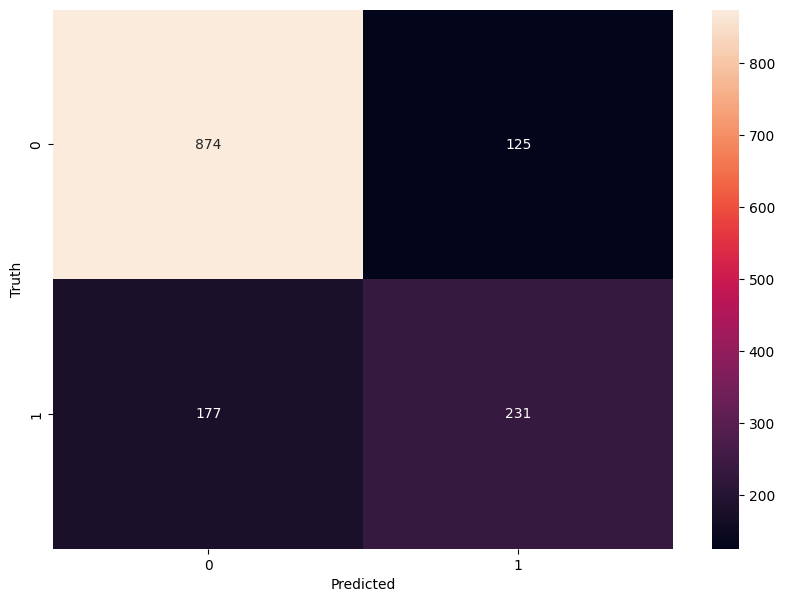

In [42]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
round((890+211)/(890+109+211+197),2)

0.78

In [44]:
round((890)/(890+197),2)

0.82

In [45]:
round((229)/(229+109),2)

0.68

In [46]:
round((890)/(890+167),2)

0.84

In [47]:
round((211)/(211+197),2)

0.52

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
def ANN(X_train , y_train , X_test , y_test , loss , weights):
  model = keras.Sequential([
      keras.layers.Dense(26,input_shape=(26,),activation='relu'),
      keras.layers.Dense(15,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

  if weights == -1 :
    model.fit(X_train,y_train,epochs=100)
  else:
    model.fit(X_train,y_train,epochs=100 , class_weights = weights)

  print(model.evaluate(X_test,y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification Report : \n",classification_report(y_test,y_preds))

  return y_preds

In [50]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7515 - loss: 0.5240
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8054 - loss: 0.4219
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4147
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8091 - loss: 0.4006
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.4044
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.4046
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4181
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8139 - loss: 0.4080
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.4056
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8157 - loss: 0.3956
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.4009
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [51]:
count_class_0 , count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [52]:
df_class_0.shape

(5163, 27)

In [53]:
df_class_1.shape

(1869, 27)

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under , df_class_1 ], axis=0)

print("Random under Sampling : ")
print(df_test_under.Churn.value_counts())

Random under Sampling : 
Churn
0    1869
1    1869
Name: count, dtype: int64


In [61]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [62]:
y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [63]:
y_preds = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6868 - loss: 0.6231
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.5176
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4856
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 0.4728
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.4674
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7710 - loss: 0.4701
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4503
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7750 - loss: 0.4746
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.4775
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4461
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.4637
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - l

Method - 2 Over Sampling

In [64]:
count_class_0 , count_class_1

(5163, 1869)

In [72]:
df_class_1_over = df_class_1.sample(count_class_0 , replace=True)

df_test_over = pd.concat([df_class_0 , df_class_1_over] , axis = 0)
print("Random Over Sampling")
print(df_test_over.Churn.value_counts())

Random Over Sampling
Churn
0    5163
1    5163
Name: count, dtype: int64


In [73]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [75]:
y_test.value_counts()

,count
Churn,
1,1033
0,1033


In [76]:
y_preds = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7269 - loss: 0.5718
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7490 - loss: 0.5066
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7550 - loss: 0.4980
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7634 - loss: 0.4857
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7574 - loss: 0.4948
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7747 - loss: 0.4752
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7614 - loss: 0.4838
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7719 - loss: 0.4717
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7705 - loss: 0.4764
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7762 - loss: 0.4746
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7676 - loss: 0.4781
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Method - 3 SMOTE

In [79]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [82]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [83]:
y_test.value_counts()

,count
Churn,
1,1033
0,1033


In [84]:
y_preds = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7016 - loss: 0.5918
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7756 - loss: 0.4772
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7787 - loss: 0.4620
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7835 - loss: 0.4509
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.4448
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4468
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4362
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8049 - loss: 0.4316
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4246
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4176
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8084 - loss: 0.4204
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Method - 4 Use of Ensemble with UnderSampling

In [86]:
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [87]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [90]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [91]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [92]:
4130/1495

2.762541806020067

In [95]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [96]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [97]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [105]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train = pd.concat([df_majority[start:end],df_minority],axis=0)

  X_train = df_train.drop('Churn',axis='columns')
  y_train = df_train['Churn']

  return X_train , y_train

In [107]:
X_train , y_train = get_train_batch(df3_class0,df3_class1,0,1495)

y_pred1 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6008 - loss: 0.6672
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.5381
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.5041
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 0.4841
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7763 - loss: 0.4722
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.4756
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7734 - loss: 0.4703
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.4725
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4801
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.4792
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.4712
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [112]:
X_train , y_train = get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5751 - loss: 0.6597
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.5210
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7595 - loss: 0.5043
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.4858
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.4886
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7653 - loss: 0.4773
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7700 - loss: 0.4698
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7585 - loss: 0.4846
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7703 - loss: 0.4784
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7675 - loss: 0.4661
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.4707
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7646 - l

In [113]:
X_train , y_train = get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5338 - loss: 0.7060
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7412 - loss: 0.5455
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.4755
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.4777
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4715
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4710
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.4707
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.4860
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7727 - loss: 0.4743
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7931 - loss: 0.4478
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7881 - loss: 0.4542
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - lo

In [116]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1 + vote2 + vote3

3

In [117]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [119]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74      1033
           1       0.44      0.83      0.57       374

    accuracy                           0.67      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.67      0.69      1407

